In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
!pip install torchtext==0.3.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!pip install transformers==3.2.0

In [ ]:
import pandas as pd

final_data = pd.read_csv("/content/train_qdiff_data_2_soft_labeled.csv")
final_data

,Question,Answer,DifficultyFromAnswerer,question_answer,difficulty_label,skill_label
0,Is the dialect spoken in Jeju located in fact ...,The dialect spoken in Jeju is in fact classifi...,hard,Is the dialect spoken in Jeju located in fact ...,1,3
1,What cello manufacturer should I buy from if I...,Luis & Clark,hard,What cello manufacturer should I buy from if I...,1,3
2,Does it have a border with Norway?,yes,medium,Does it have a border with Norway? yes,2,2
3,How many people use the bus network daily?,More than 2.78 million people.,easy,How many people use the bus network daily? Mor...,0,2
4,Who founded Montevideo?,The Spanish.,medium,Who founded Montevideo? The Spanish.,2,2
...,...,...,...,...,...,...
2763,Did he become a professor before the revolutio...,yes,hard,Did he become a professor before the revolutio...,1,3
2764,Does Vietnamese borrow from Latin and Greek?,"No, Vietnamese does not borrow from Latin and ...",medium,Does Vietnamese borrow from Latin and Greek? N...,2,3
2765,Where is San Francisco?,San Francisco is in California.,medium,Where is San Francisco? San Francisco is in Ca...,2,3
2766,What is the primary item in an otter's diet?,fish,medium,What is the primary item in an otter's diet? fish,2,2


In [ ]:
final_data["question_answer"].values

array(['Is the dialect spoken in Jeju located in fact classified as a different language by all Korean linguists? The dialect spoken in Jeju is in fact classified as a different language by some Korean linguists.',
       'What cello manufacturer should I buy from if I want to play outside? Luis & Clark',
       'Does it have a border with Norway? yes', ...,
       'Where is San Francisco? San Francisco is in California.',
       "What is the primary item in an otter's diet? fish",
       'Where are turtle eggs layed? Turtles lay eggs on land.'],
      dtype=object)

In [ ]:
final_data['skill_label'].value_counts()

3    1813
2     801
4     120
1      29
0       5
Name: skill_label, dtype: int64

In [ ]:


!cp "/content/drive/My Drive/research_skill_name_prediction/label_encoder_difficulty_Lstm"  /content

In [ ]:
!cp "/content/drive/My Drive/research_skill_name_prediction/label_encoder_skill_lstm"  /content

In [ ]:
import joblib
LE_skill = joblib.load("label_encoder_skill_lstm")

In [ ]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

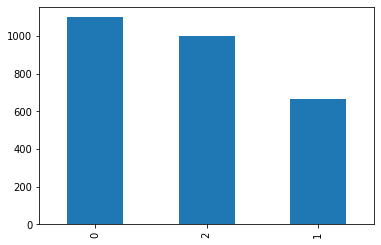

In [ ]:
final_data['difficulty_label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
val = pd.read_csv("/content/val_qdiff_data_2_soft_labeled.csv")

In [ ]:
val

,Question,Answer,DifficultyFromAnswerer,difficulty_label,question_answer,skill_label
0,What are turtle eggs covered in when they incu...,mud or sand,hard,1,What are turtle eggs covered in when they incu...,2
1,What is given for the number of native speakers?,No figure is given for the number of native sp...,hard,1,What is given for the number of native speaker...,3
2,How many long was Lincoln's formal education?,18 months,easy,0,How many long was Lincoln's formal education? ...,3
3,who was his mentor?,John 'Mad Jack' Fuller,medium,2,who was his mentor? John 'Mad Jack' Fuller,3
4,Can black swans swim with only one leg?,yes,easy,0,Can black swans swim with only one leg? yes,3
...,...,...,...,...,...,...
303,Is Berlin the capital city of Germany?,Berlin is the capital city of Germany.,easy,0,Is Berlin the capital city of Germany? Berlin ...,3
304,Who did James Monroe live with in New York City?,His daughter Maria Hester Monroe Gouverneur,medium,2,Who did James Monroe live with in New York Cit...,3
305,What is one of the challenges of re-establishi...,roadkill deaths,hard,1,What is one of the challenges of re-establishi...,2
306,Is Santiago the national capital of a country?,Yes,easy,0,Is Santiago the national capital of a country?...,3


In [ ]:
test = pd.read_csv("/content/test_qdiff_data_2_soft_labeled.csv")
test

,Question,Answer,DifficultyFromAnswerer,difficulty_label,question_answer,skill_label
0,How are western-style xylophones characterised?,"by a bright, sharp tone and high register",medium,2,How are western-style xylophones characterised...,2
1,Is Nairobi the capital of Kenya?,Yes,easy,0,Is Nairobi the capital of Kenya? Yes,3
2,How many sister cities does the City of Melbou...,six,medium,2,How many sister cities does the City of Melbou...,3
3,Is the electric eel a true eel?,No,easy,0,Is the electric eel a true eel? No,3
4,Does Swedish use the perfect participle to for...,No.,easy,0,Does Swedish use the perfect participle to for...,3
...,...,...,...,...,...,...
337,Where was there a vast swarm of butterflies?,In Kyoto there was a vast swarm of butterflies.,medium,2,Where was there a vast swarm of butterflies? I...,3
338,What is the most common romanization standard ...,Hanyu Pinyin,medium,2,What is the most common romanization standard ...,3
339,Is Jakarta the 12th largest city in the world?,yes,medium,2,Is Jakarta the 12th largest city in the world?...,2
340,What sort of turtles are ectothermic?,all of them,medium,2,What sort of turtles are ectothermic? all of them,2


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:

def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE = joblib.load('label_encoder_difficulty_Lstm')

get_labels(0)

'Difficult'

In [ ]:
final_data

,Question,Answer,DifficultyFromAnswerer,question_answer,difficulty_label,skill_label
0,Is the dialect spoken in Jeju located in fact ...,The dialect spoken in Jeju is in fact classifi...,hard,Is the dialect spoken in Jeju located in fact ...,1,3
1,What cello manufacturer should I buy from if I...,Luis & Clark,hard,What cello manufacturer should I buy from if I...,1,3
2,Does it have a border with Norway?,yes,medium,Does it have a border with Norway? yes,2,2
3,How many people use the bus network daily?,More than 2.78 million people.,easy,How many people use the bus network daily? Mor...,0,2
4,Who founded Montevideo?,The Spanish.,medium,Who founded Montevideo? The Spanish.,2,2
...,...,...,...,...,...,...
2763,Did he become a professor before the revolutio...,yes,hard,Did he become a professor before the revolutio...,1,3
2764,Does Vietnamese borrow from Latin and Greek?,"No, Vietnamese does not borrow from Latin and ...",medium,Does Vietnamese borrow from Latin and Greek? N...,2,3
2765,Where is San Francisco?,San Francisco is in California.,medium,Where is San Francisco? San Francisco is in Ca...,2,3
2766,What is the primary item in an otter's diet?,fish,medium,What is the primary item in an otter's diet? fish,2,2


In [ ]:
new_data = final_data

In [ ]:
question_answer = new_data["question_answer"].values
categories = new_data["difficulty_label"].values

In [ ]:
question_answer

array(['Is the dialect spoken in Jeju located in fact classified as a different language by all Korean linguists? The dialect spoken in Jeju is in fact classified as a different language by some Korean linguists.',
       'What cello manufacturer should I buy from if I want to play outside? Luis & Clark',
       'Does it have a border with Norway? yes', ...,
       'Where is San Francisco? San Francisco is in California.',
       "What is the primary item in an otter's diet? fish",
       'Where are turtle eggs layed? Turtles lay eggs on land.'],
      dtype=object)

In [ ]:
question_answer[0]

'Is the dialect spoken in Jeju located in fact classified as a different language by all Korean linguists? The dialect spoken in Jeju is in fact classified as a different language by some Korean linguists.'

In [ ]:
len(categories)

2768

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Is the dialect spoken in Jeju located in fact classified as a different language by all Korean linguists? The dialect spoken in Jeju is in fact classified as a different language by some Korean linguists.
Token IDs: tensor([  101,  2003,  1996,  9329,  5287,  1999, 15333,  9103,  2284,  1999,
         2755,  6219,  2004,  1037,  2367,  2653,  2011,  2035,  4759, 22978,
         2015,  1029,  1996,  9329,  5287,  1999, 15333,  9103,  2003,  1999,
         2755,  6219,  2004,  1037,  2367,  2653,  2011,  2070,  4759, 22978,
         2015,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
print('Original: ', len(question_answer[1]))
print('Token IDs:', len(input_ids[1]))

Original:  81
Token IDs: 128


In [ ]:
val = val.dropna(subset=["question_answer"])

In [ ]:
val_text = val["question_answer"].values
val_labels = val["difficulty_label"].values
test_text = test["question_answer"].values
test_labels = test["difficulty_label"].values

In [ ]:
test_labels

array([2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,

In [ ]:
val_labels

array([1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0,
       1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0,
       1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 0, 0,
       1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1,
       0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0,

In [ ]:
val_input_ids = []
val_attention_masks = []

for sent in val_text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    val_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    val_attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', val_text[0])
print('Token IDs:', val_attention_masks[0])

Original:  What are turtle eggs covered in when they incubate? mud or sand
Token IDs: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print('Original: ', val_text[1])
print('Token IDs:', val_input_ids[1])

Original:  What is given for the number of native speakers? No figure is given for the number of native speakers.
Token IDs: tensor([ 101, 2054, 2003, 2445, 2005, 1996, 2193, 1997, 3128, 7492, 1029, 2053,
        3275, 2003, 2445, 2005, 1996, 2193, 1997, 3128, 7492, 1012,  102,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])


In [ ]:
labels = torch.tensor(categories)
val_labels = torch.tensor(val_labels)

In [ ]:
val_labels

tensor([1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1,
        1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2,
        0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
        2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2,
        1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
        0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2,
        2, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0,
        2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2,
        1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0,
        0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2,
        1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
        2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1,

In [ ]:
get_labels(1)

'Easy'

In [ ]:
len(set(final_data["question_answer"].values).intersection(val["question_answer"].values))

46

In [ ]:
num_classes = len(list(set(categories)))
list(set(categories))

[0, 1, 2]

In [ ]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks,val_labels) 
# Create a 90-10train-validation split.

# Calculate the number of samples to include in each set.
# train_size = int(0.90 * len(dataset))
# val_size = len(dataset) - train_size

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# # print('{:>5,} validation samples'.format(val_size))

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 34
train_dataloader = DataLoader(
            dataset,  # The training samples.
            sampler = RandomSampler(dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
from transformers import BertModel, AdamW, BertConfig

# # Loads BertForSequenceClassification, the pretrained BERT model with a single 
# model = BertModel.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
# )

# # Tell pytorch to run this model on the GPU.
# model.cuda()

In [ ]:




set(test["question_answer"].values).intersection(set(final_data["question_answer"].values))

{'Approximately how many species of Testudines are alive today? 300',
 'Are all dialects of Korean similar to each other? Yes',
 'Are pocket trumpets compact B trumpets? yes',
 'Are wolves built for stamina? Yes',
 'Around how many recognized octopus species are there? There are around 300 recognized octopus species.',
 'Copenhagen is the capital of what country? Denmark',
 'Did Lincoln ever represent Alton & Sangamon Railroad? Yes',
 "Did Monroe' wedding happen at the Trinity Church in New York? Yes",
 'Do linguists often view Chinese as a language family? Yes, linguists often view Chinese as a language family.',
 'Does Modern Standard Arabic continue to evolve like other languages? yes',
 'Does Theodore Roosevelt have a brother? Yes',
 'Does every drumhead make the same sound? no',
 'Does the octopus have a hard beak? Yes, the octopus has a hard beak.',
 'Have cymbals been used historically to suggest bacchanal? Yes',
 'How many children did Avogadro have? six',
 'How many species of

In [ ]:
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_bert_skill_prediction_data_2.zip"
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_difficulty_prediction_data_2" /content

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_prediction_data_2" /content

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_data_2_final" /content

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_pre_trained_skill_bert_data_2" /content

In [ ]:
!pip install torchtext
import torchtext

In [ ]:
!cp -r  "/content/drive/MyDrive/research_skill_name_prediction/model_bert_skill_prediction_cascade_data_2" /content
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_save_BLOOM_difficulty_Lstm_data_2" /content
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_save_gru_difficulty_name.zip"

cp: missing destination file operand after '/content/drive/MyDrive/research_skill_name_prediction/model_save_gru_difficulty_name.zip'
Try 'cp --help' for more information.


In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_difficulty_cascade_data_2" /content


In [ ]:

text = torchtext.data.Field(lower=True, batch_first=True, tokenize='spacy', include_lengths=True)
target = torchtext.data.Field(sequential=False, use_vocab=False, is_target=True)
# use field objects to read training, validation and test sets
train = torchtext.data.TabularDataset(path='/content/train_qdiff_data_2_soft_labeled.csv', format='csv',
                                      fields={'question_answer': ('text',text),
                                              'difficulty_label': ('target',target)})
val = torchtext.data.TabularDataset(path='/content/val_qdiff_data_2_soft_labeled.csv', format='csv',
                                    fields={'question_answer': ('text',text),
                                              'difficulty_label': ('target',target)})
test_text = torchtext.data.TabularDataset(path='/content/test_qdiff_data_2_soft_labeled.csv', format='csv',
                                     fields={'difficulty_label': ('label', target),
                                             'question_answer': ('text',text)})

In [ ]:
batch_size = 34
train_iter = torchtext.data.Iterator(dataset=train,
                                           batch_size=batch_size,
                                           sort_key=lambda x: x.text.__len__(),
                                           shuffle=True,
                                           sort_within_batch=True) 
val_iter = torchtext.data.Iterator(dataset=val,
                                         batch_size=batch_size,
                                         sort_key=lambda x: x.text.__len__(),
                                         train=False,
                                         sort_within_batch=True)
test_iter = torchtext.data.Iterator(dataset=test_text,
                                          batch_size=batch_size,
                                          sort=False,
                                          sort_within_batch=False)

In [ ]:
import torchtext.vocab as vocab


In [ ]:
text.build_vocab(train, val, test_text,vectors="glove.6B.100d", min_freq=3)


In [ ]:
print(text.vocab.vectors.shape)
print(f"Unique tokens in text vocabulary: {len(text.vocab)}")

torch.Size([2309, 100])
Unique tokens in text vocabulary: 2309


In [ ]:
num_classes

3

In [ ]:
# attention layer code inspired from: https://discuss.pytorch.org/t/self-attention-on-words-and-masking/5671/4
from torch import nn
class Attention(nn.Module):
    def __init__(self, hidden_size, batch_first=False):
        super(Attention, self).__init__()

        self.hidden_size = hidden_size
        self.batch_first = batch_first

        self.att_weights = nn.Parameter(torch.Tensor(1, hidden_size), requires_grad=True)

        stdv = 1.0 / np.sqrt(self.hidden_size)
        for weight in self.att_weights:
            nn.init.uniform_(weight, -stdv, stdv)

    def get_mask(self):
        pass

    def forward(self, inputs, lengths):
        if self.batch_first:
            batch_size, max_len = inputs.size()[:2]
        else:
            max_len, batch_size = inputs.size()[:2]
            
        # apply attention layer
        weights = torch.bmm(inputs,
                            self.att_weights
                            .permute(1, 0)  
                            .unsqueeze(0)  
                            .repeat(batch_size, 1, 1) 
                            )
    
        attentions = torch.softmax(F.relu(weights.squeeze()), dim=-1)

        mask = torch.ones(attentions.size(), requires_grad=True).cuda()
        for i, l in enumerate(lengths):  # skip the first sentence
            if l < max_len:
                mask[i, l:] = 0

        masked = attentions * mask
        _sums = masked.sum(-1).unsqueeze(-1)  # sums per row
        
        attentions = masked.div(_sums)

        weighted = torch.mul(inputs, attentions.unsqueeze(-1).expand_as(inputs))

        representations = weighted.sum(1).squeeze()

        return representations, attentions

In [ ]:
from torch import nn
class MultiClassClassifierGRU(nn.Module):
  def __init__(self, pretrained_lm, hidden_dim=228, lstm_layer=2, dropout=0.2):
        super(MultiClassClassifierGRU, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.embedding = nn.Embedding.from_pretrained(pretrained_lm)
        self.embedding.weight.requires_grad = False
        self.gru1 = nn.GRU(input_size=self.embedding.embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=1, 
                            bidirectional=True)
        self.atten1 = Attention(hidden_dim*2, batch_first=True) # 2 is bidrectional
        self.gru2 = nn.GRU(input_size=hidden_dim*2,
                            hidden_size=hidden_dim,
                            num_layers=1, 
                            bidirectional=True)
        self.atten2 = Attention(hidden_dim*2, batch_first=True)
        self.fc1 = nn.Sequential(nn.Linear(hidden_dim*7*2, hidden_dim*7*2),
                                 nn.BatchNorm1d(hidden_dim*7*2),
                                 nn.ReLU()) 
        self.fc2 = nn.Linear(hidden_dim*7*2, num_classes)

    
  def forward(self, x, x_len):
        x = self.embedding(x)
        x = self.dropout(x)
        
        x = nn.utils.rnn.pack_padded_sequence(x, x_len, batch_first=True, enforce_sorted=False)
        out1, h_n = self.gru1(x)

        x, lengths = nn.utils.rnn.pad_packed_sequence(out1, batch_first=True)
        lengths_tensor = torch.autograd.Variable(torch.FloatTensor(lengths.float())).view(-1,1)

        average_pooling = torch.sum(x,dim=1)/lengths_tensor.to(device)
        max_pooling =  torch.nn.functional.adaptive_max_pool1d(x.permute(0,2,1), (1,)).view(x.size()[0],-1)

        # print(pooled_output_1.size())

        x, _ = self.atten1(x, lengths) # skip connect
        if len(x.shape)==1:
          x = x.reshape(1,-1)
        pooled_output_1 = torch.cat([x,h_n[-1],average_pooling,max_pooling],dim=1)


        # print(pooled_output_1.size())

        out2, h_n = self.gru2(out1)
        y, lengths = nn.utils.rnn.pad_packed_sequence(out2, batch_first=True)

        lengths_tensor = torch.autograd.Variable(torch.FloatTensor(lengths.float())).view(-1,1)

        average_pooling = torch.sum(y,dim=1)/lengths_tensor.to(device)
        max_pooling =  torch.nn.functional.adaptive_max_pool1d(y.permute(0,2,1), (1,)).view(y.size()[0],-1)
        y, _ = self.atten2(y, lengths)
        if len(y.shape)==1:
          y = y.reshape(1,-1)
        pooled_output_2 = torch.cat([y,h_n[-1],average_pooling,max_pooling],dim=1)

        z = torch.cat([pooled_output_1, pooled_output_2], dim=1)

        z = self.fc1(self.dropout(z))
        z = self.fc2(self.dropout(z))
        return z


In [ ]:
import numpy as np
model_gru = MultiClassClassifierGRU(text.vocab.vectors, hidden_dim=400, lstm_layer=2, dropout=0.3).cuda()
model_gru.load_state_dict(torch.load("model_save_gru_difficulty_name/model_weights"))

In [ ]:
from torch import nn
class MultiClassClassifierLstm(nn.Module):
  def __init__(self, pretrained_lm, hidden_dim=128, lstm_layer=2, dropout=0.2):
        super(MultiClassClassifierLstm, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.embedding = nn.Embedding.from_pretrained(pretrained_lm)
        self.embedding.weight.requires_grad = False
        self.lstm1 = nn.LSTM(input_size=self.embedding.embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=1, 
                            bidirectional=True)
        self.atten1 = Attention(hidden_dim*2, batch_first=True) # 2 is bidrectional
        self.lstm2 = nn.LSTM(input_size=hidden_dim*2,
                            hidden_size=hidden_dim,
                            num_layers=1, 
                            bidirectional=True)
        self.atten2 = Attention(hidden_dim*2, batch_first=True)
        self.fc1 = nn.Sequential(nn.Linear(hidden_dim*lstm_layer*2, hidden_dim*lstm_layer*2),
                                 nn.BatchNorm1d(hidden_dim*lstm_layer*2),
                                 nn.ReLU()) 
        self.fc2 = nn.Linear(hidden_dim*lstm_layer*2, 3)

    
  def forward(self, x, x_len):
        x = self.embedding(x)
        x = self.dropout(x)
        
        x = nn.utils.rnn.pack_padded_sequence(x, x_len, batch_first=True, enforce_sorted=False)
        out1, (h_n, c_n) = self.lstm1(x)
        x, lengths = nn.utils.rnn.pad_packed_sequence(out1, batch_first=True)
        x, _ = self.atten1(x, lengths) # skip connect

        out2, (h_n, c_n) = self.lstm2(out1)
        y, lengths = nn.utils.rnn.pad_packed_sequence(out2, batch_first=True)
        y, _ = self.atten2(y, lengths)
        
        if len(x.shape)==1:
          x = x.reshape(1,-1)
          y = y.reshape(1,-1)

        z = torch.cat([x, y], dim=1)
        z = self.fc1(self.dropout(z))
        z = self.fc2(self.dropout(z))
        return z


In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_save_BLOOM_difficulty_Lstm_data_2" /content/

In [ ]:
import numpy as np
model_lstm = MultiClassClassifierLstm(text.vocab.vectors, hidden_dim=128, lstm_layer=2, dropout=0.3).cuda()
model_lstm.load_state_dict(torch.load("model_save_BLOOM_difficulty_Lstm_data_2/model_weights"))

<All keys matched successfully>

In [ ]:
from torch import nn
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count, hidden_dim=768, mlp_dim=500, extras_dim=100, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim, mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # # nn.ReLU(),
            # # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _,pooled_output = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        # concat_output = torch.cat((dropout_output, topic_emb), dim=1)
        # concat_output = self.dropout(concat_output)
        mlp_output = self.mlp(dropout_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_difficulty_prediction_data_2" /content

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Loads BertForSequenceClassification, the pretrained BERT model with a single 
model = MultiClassClassifier('bert-base-uncased',num_classes, 768,500,140,dropout=0.1,freeze_bert=False)

model.load_state_dict(torch.load("model_bert_difficulty_prediction_data_2/model_weights"))

# Tell pytorch to run this model on the GPU.
model.cuda()


MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
from torch import nn
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _,pooled_output = self.bert(tokens, attention_mask=masks)

        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output
        mlp_output = self.mlp(concat_output)
        skill_output = self.mlp2(concat_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output

In [ ]:
num_classes

3

In [ ]:
model_multi_task = MultiClassClassifier('bert-base-uncased',3, 5,768,500,140,dropout=0.1,freeze_bert=False)
model_multi_task.load_state_dict(torch.load('model_bert_multi_task_prediction_data_2/model_weights'))
model_multi_task.cuda()

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
model_cascade = MultiClassClassifier('bert-base-uncased',num_classes, 768,500,140,dropout=0.1,freeze_bert=False)

model_cascade.load_state_dict(torch.load("model_bert_difficulty_cascade_data_2/model_weights"))

<All keys matched successfully>

In [ ]:
model_cascade.cuda()

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
from torch import nn


class AttentionBlock(nn.Module):
  def __init__(self,vector_1_dim,vector_2_dim):
    super(AttentionBlock, self).__init__()
    self.Weights = nn.Parameter(torch.rand(vector_2_dim,vector_1_dim))
    self.bias = nn.Parameter(torch.zeros(1))

  def forward(self,vector_1,vector_2):
    #(batch_size,vector_2_dim,vector_1_dim)
    weights = self.Weights.repeat(vector_2.size(0),1,1)
    vector_1 = vector_1.unsqueeze(-1)  # (batch_size,vector_2_dim,vector_1_dim)
    weights = weights.matmul(vector_1) # results in (batch_size,vector_2_dim,1)
    weights = weights.repeat(vector_2.size(1),1,1,1).transpose(0,1)
    vector_2 = vector_2.unsqueeze(-2)
    attention_weights = torch.tanh(vector_2.matmul(weights).squeeze() + self.bias) # batch_size, vector_2_dim.size(0)
    if len(attention_weights.shape) ==1:
      attention_weights = attention_weights.squeeze()
      attention_weights = attention_weights.reshape(1,-1)
    attention_weights = attention_weights.squeeze()
    # print("torch.exp(attention_weights)",torch.exp(attention_weights).shape,attention_weights.shape,torch.exp(attention_weights).sum(dim=1).shape)
    attention_weights = torch.exp(attention_weights)/ torch.exp(attention_weights).sum(dim=1,keepdim=True)

    return attention_weights

# bloom interactive attention
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)
        self.dropout = nn.Dropout(dropout)
        self.bloom_attention = AttentionBlock(768, 768)

        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(  
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,hidden_states,attentions = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output

        # mlp_output = self.mlp(concat_output)
        skill_output_probas = self.mlp2(concat_output)
        skill_output = torch.argmax(skill_output_probas,axis=1).cpu().numpy()
        skill_output = LE_skill.inverse_transform(skill_output)
        skill_input_ids = []
        skill_attention_masks = []
        for skill_text in skill_output:
          encoded_skill_output = tokenizer.encode_plus(
                          skill_text,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 128,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          truncation=True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
          skill_input_ids.append(encoded_skill_output['input_ids'])
          skill_attention_masks.append(encoded_skill_output['attention_mask'])
        skill_input_ids = torch.cat(skill_input_ids,dim=0).cuda()
        skill_attention_masks = torch.cat(skill_attention_masks,dim=0).cuda()
        _,_,hidden_states_skill,_ = self.bert(skill_input_ids,skill_attention_masks)

        skill_hidden_averaged =  torch.sum(hidden_states_skill[12],dim=1)/hidden_states_skill[12].shape[1]

        bloom_attention_weights = self.bloom_attention(skill_hidden_averaged, hidden_states[12])

        bloom_attention_weights = bloom_attention_weights.unsqueeze(-2)
        # print("context_attention_weights",context_attention_weights.shape,context_out.shape)
        input_attended_vector = bloom_attention_weights.matmul(hidden_states[12]).squeeze()

        mlp_output = self.mlp(input_attended_vector)

        # print("bloom attention weights", bloom_attention_weights.shape)
        # print("_hidden_states",hidden_states_skill[12].shape, hidden_states[12].shape,skill_hidden_averaged.shape)

        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output_probas

In [ ]:
skill_label_count = len(list(set(new_data["skill_label"].values)))
skill_label_count

5

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_data_2_final" /content/

In [ ]:
model_interactive = MultiClassClassifier('bert-base-uncased',num_classes, skill_label_count,768,500,140,dropout=0.1,freeze_bert=False)
model_interactive.load_state_dict(torch.load("model_bert_multi_task_interactive_data_2_final/model_weights"))
model_interactive.cuda()

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_interactive_skill_given_data_2" /content

In [ ]:
from torch import nn


class Attention(nn.Module):
  def __init__(self,vector_1_dim,vector_2_dim):
    super(Attention, self).__init__()
    self.Weights = nn.Parameter(torch.rand(vector_2_dim,vector_1_dim))
    self.bias = nn.Parameter(torch.zeros(1))

  def forward(self,vector_1,vector_2):
    #(batch_size,vector_2_dim,vector_1_dim)
    weights = self.Weights.repeat(vector_2.size(0),1,1)
    vector_1 = vector_1.unsqueeze(-1)  # (batch_size,vector_2_dim,vector_1_dim)
    weights = weights.matmul(vector_1) # results in (batch_size,vector_2_dim,1)
    weights = weights.repeat(vector_2.size(1),1,1,1).transpose(0,1)
    vector_2 = vector_2.unsqueeze(-2)
    attention_weights = torch.tanh(vector_2.matmul(weights).squeeze() + self.bias) # batch_size, vector_2_dim.size(0)
    if len(attention_weights.shape) ==1:
      attention_weights = attention_weights.squeeze()
      attention_weights = attention_weights.reshape(1,-1)
    attention_weights = attention_weights.squeeze()
    # print("torch.exp(attention_weights)",torch.exp(attention_weights).shape,attention_weights.shape,torch.exp(attention_weights).sum(dim=1).shape)
    attention_weights = torch.exp(attention_weights)/ torch.exp(attention_weights).sum(dim=1,keepdim=True)

    return attention_weights

# bloom interactive attention
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)
        self.dropout = nn.Dropout(dropout)
        self.bloom_attention = Attention(768, 768)

        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(  
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks,skill_label):
        _, pooled_output,hidden_states,attentions = self.bert(tokens, attention_mask=masks)
        # dropout_output = self.dropout(pooled_output)
        # concat_output = dropout_output

        # # mlp_output = self.mlp(concat_output)
        # skill_output_probas = self.mlp2(concat_output)
        # skill_output = torch.argmax(skill_output_probas,axis=1).cpu().numpy()
        # skill_output = LE_skill.inverse_transform(skill_output)
        skill_input_ids = []
        skill_attention_masks = []
        skill_label = skill_label.cpu().numpy()
        skill_label = LE_skill.inverse_transform(skill_label)

        for skill_text in skill_label:
          encoded_skill_output = tokenizer.encode_plus(
                          skill_text,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 128,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          truncation=True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
          skill_input_ids.append(encoded_skill_output['input_ids'])
          skill_attention_masks.append(encoded_skill_output['attention_mask'])
        skill_input_ids = torch.cat(skill_input_ids,dim=0).cuda()
        skill_attention_masks = torch.cat(skill_attention_masks,dim=0).cuda()
        _,_,hidden_states_skill,_ = self.bert(skill_input_ids,skill_attention_masks)

        skill_hidden_averaged =  torch.sum(hidden_states_skill[12],dim=1)/hidden_states_skill[12].shape[1]

        bloom_attention_weights = self.bloom_attention(skill_hidden_averaged, hidden_states[12])

        bloom_attention_weights = bloom_attention_weights.unsqueeze(-2)
        # print("context_attention_weights",context_attention_weights.shape,context_out.shape)
        input_attended_vector = bloom_attention_weights.matmul(hidden_states[12]).squeeze()
        # print("input_attended_vector",input_attended_vector.shape)
        mlp_output = self.mlp(input_attended_vector)

        # print("bloom attention weights", bloom_attention_weights.shape)
        # print("_hidden_states",hidden_states_skill[12].shape, hidden_states[12].shape,skill_hidden_averaged.shape)

        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output

In [ ]:
model_skill_given = MultiClassClassifier('bert-base-uncased',num_classes, skill_label_count,768,500,140,dropout=0.1,freeze_bert=False)
model_skill_given.load_state_dict(torch.load("model_bert_multi_task_interactive_skill_given_data_2/model_weights"))
model_skill_given.cuda()

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
from torch import nn
class SkillClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, 5)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,_,_ = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output
        mlp_output = self.mlp(concat_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_bert_skill_prediction_data_2" /content

In [ ]:
skill_model = SkillClassifier('bert-base-uncased',num_classes, 768,500,140,dropout=0.1,freeze_bert=False)
skill_model.load_state_dict(torch.load("model_bert_skill_prediction_data_2/model_weights"))
skill_model.cuda()

In [ ]:
from torch import nn


class Attention(nn.Module):
  def __init__(self,vector_1_dim,vector_2_dim):
    super(Attention, self).__init__()
    self.Weights = nn.Parameter(torch.rand(vector_2_dim,vector_1_dim))
    self.bias = nn.Parameter(torch.zeros(1))

  def forward(self,vector_1,vector_2):
    #(batch_size,vector_2_dim,vector_1_dim)
    weights = self.Weights.repeat(vector_2.size(0),1,1)
    vector_1 = vector_1.unsqueeze(-1)  # (batch_size,vector_2_dim,vector_1_dim)
    weights = weights.matmul(vector_1) # results in (batch_size,vector_2_dim,1)
    weights = weights.repeat(vector_2.size(1),1,1,1).transpose(0,1)
    vector_2 = vector_2.unsqueeze(-2)
    attention_weights = torch.tanh(vector_2.matmul(weights).squeeze() + self.bias) # batch_size, vector_2_dim.size(0)
    if len(attention_weights.shape) ==1:
      attention_weights = attention_weights.squeeze()
      attention_weights = attention_weights.reshape(1,-1)
    attention_weights = attention_weights.squeeze()
    # print("torch.exp(attention_weights)",torch.exp(attention_weights).shape,attention_weights.shape,torch.exp(attention_weights).sum(dim=1).shape)
    attention_weights = torch.exp(attention_weights)/ torch.exp(attention_weights).sum(dim=1,keepdim=True)

    return attention_weights

# bloom interactive attention
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=True,output_attentions=True)

        self.skill_bert = skill_model
        self.dropout = nn.Dropout(dropout)
        self.bloom_attention = Attention(768, 768)

        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(  
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        _, pooled_output,hidden_states,attentions = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output)
        concat_output = dropout_output

        # mlp_output = self.mlp(concat_output)
        skill_output_probas = self.skill_bert(tokens,masks)
        skill_output = torch.argmax(skill_output_probas,axis=1).cpu().numpy()
        skill_output = LE_skill.inverse_transform(skill_output)
        skill_input_ids = []
        skill_attention_masks = []
        for skill_text in skill_output:
          encoded_skill_output = tokenizer.encode_plus(
                          skill_text,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 128,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          truncation=True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
          skill_input_ids.append(encoded_skill_output['input_ids'])
          skill_attention_masks.append(encoded_skill_output['attention_mask'])
        skill_input_ids = torch.cat(skill_input_ids,dim=0).cuda()
        skill_attention_masks = torch.cat(skill_attention_masks,dim=0).cuda()
        _,_,hidden_states_skill,_ = self.skill_bert.bert(skill_input_ids,skill_attention_masks)

        skill_hidden_averaged =  torch.sum(hidden_states_skill[12],dim=1)/hidden_states_skill[12].shape[1]

        bloom_attention_weights = self.bloom_attention(skill_hidden_averaged, hidden_states[12])

        bloom_attention_weights = bloom_attention_weights.unsqueeze(-2)
        # print("context_attention_weights",context_attention_weights.shape,context_out.shape)
        input_attended_vector = bloom_attention_weights.matmul(hidden_states[12]).squeeze()

        mlp_output = self.mlp(input_attended_vector)

        # print("bloom attention weights", bloom_attention_weights.shape)
        # print("_hidden_states",hidden_states_skill[12].shape, hidden_states[12].shape,skill_hidden_averaged.shape)

        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)


        return mlp_output,skill_output_probas

In [ ]:
model_interactive_pre_trained = MultiClassClassifier('bert-base-uncased',num_classes, 5,768,500,140,dropout=0.1,freeze_bert=False)
model_interactive_pre_trained.load_state_dict(torch.load("model_bert_multi_task_interactive_pre_trained_skill_bert_data_2/model_weights"))
model_interactive_pre_trained.cuda()


MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
# for param in model.bert.encoder.layer[0:12].parameters():
#     param.requires_grad=False
# for param in model.bert.embeddings.parameters():
#     param.requires_grad=False


In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:

from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

1151

In [ ]:
1935 * 32

61920

In [ ]:

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
test

,Question,Answer,DifficultyFromAnswerer,difficulty_label,question_answer,skill_label
0,How are western-style xylophones characterised?,"by a bright, sharp tone and high register",medium,2,How are western-style xylophones characterised...,2
1,Is Nairobi the capital of Kenya?,Yes,easy,0,Is Nairobi the capital of Kenya? Yes,3
2,How many sister cities does the City of Melbou...,six,medium,2,How many sister cities does the City of Melbou...,3
3,Is the electric eel a true eel?,No,easy,0,Is the electric eel a true eel? No,3
4,Does Swedish use the perfect participle to for...,No.,easy,0,Does Swedish use the perfect participle to for...,3
...,...,...,...,...,...,...
337,Where was there a vast swarm of butterflies?,In Kyoto there was a vast swarm of butterflies.,medium,2,Where was there a vast swarm of butterflies? I...,3
338,What is the most common romanization standard ...,Hanyu Pinyin,medium,2,What is the most common romanization standard ...,3
339,Is Jakarta the 12th largest city in the world?,yes,medium,2,Is Jakarta the 12th largest city in the world?...,2
340,What sort of turtles are ectothermic?,all of them,medium,2,What sort of turtles are ectothermic? all of them,2


In [ ]:
test_features = test["question_answer"].values
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [ ]:




test_labels

array([2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,

In [ ]:
test_features[0]

'How are western-style xylophones characterised? by a bright, sharp tone and high register'

In [ ]:
input_ids = []
attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
test_labels = torch.tensor(test_labels)
test_skill_labels = torch.tensor(test_skill_labels)

# Set the batch size.  
batch_size = 34

# test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# print(test_poincare_tensor.shape)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# print("difficulty_tensor",difficulty_tensor.shape)
# Combine the training inputs into a TensorDataset.
prediction_data = TensorDataset(input_ids, attention_masks, test_labels,test_skill_labels)
# Create the DataLoader.
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:


!pip install ax-platform==0.1.9

In [ ]:
from ax import optimize

In [ ]:
from sklearn.metrics import precision_recall_fscore_support


In [ ]:
def get_confusion_matrix(predicted,actual):
    conf_matrix = np.zeros((3, 3))
    for pred,act in zip(predicted,actual):
        conf_matrix[act,pred]+=1
    return conf_matrix
        
def get_TP(confusion_matrix,label):
    tp = confusion_matrix[label][label]
    return tp

def get_FN(confusion_matrix,label):
    row = confusion_matrix[label,]
    row_truepositives = row[label]
    fn = row.sum() - row_truepositives
    return fn

def get_FP(confusion_matrix,tag):
    col = confusion_matrix[:,tag]
    col_tp = col[tag]
    #  sum of all values in column except tp
    fp = col.sum() - col_tp
    return fp
def Precision(conf_matrix):
    precision = 0.0
    for label in [0,1,2]:
        dividor= get_TP(conf_matrix,label)+get_FP(conf_matrix,label)
        if dividor != 0.0:
            precision += (get_TP(conf_matrix,label))/dividor
    return (precision / 3)

def Recall(conf_matrix):
    recall = 0.0
    for label in [0,1,2]:
        dividor=get_TP(conf_matrix,label)+get_FN(conf_matrix,label)
        if dividor != 0.0:
            recall += (get_TP(conf_matrix,label))/dividor
    return (recall / 3)

def F1(precision,recall):
    return (2*precision*recall)/(precision+recall)
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
def print_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision(conf_matrix)
    recall = Recall(conf_matrix)
    f1_score = F1(precision,recall)
    return (precision,recall,f1_score)

In [ ]:

def Precision_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_precision = dict()
    for label in [0,1,2]:
        true_sample = [sample for sample in test_samples if sample==label ]
        if (get_TP(conf_matrix,label)+get_FP(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) *(get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label)))
            label_wise_precision[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label))

    
    precision =  accum/len(test_samples)
            
    return precision


def Recall_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_recall = dict()
    for label in [0,1,2]:
        true_sample = [sample for sample in test_samples if sample==label ]

        if (get_TP(conf_matrix,label)+get_FN(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) * (get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label)))
            label_wise_recall[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label))

    
    recall =  accum/len(test_samples)
    return recall
def print_weighted_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision_macro_weighted(conf_matrix,test_labels)
    recall = Recall_macro_weighted(conf_matrix,test_labels)
    f1_score = F1(precision,recall)
    return (precision,recall,f1_score)

In [ ]:
def make_lstm_and_gru_predictions(index, params):
  model_lstm.eval()
  # model_gru.eval()
  for i,batch in enumerate(test_iter):
    outputs = []
    if i == index:
      # print("i",i,index)
      with torch.no_grad():
          question, x_len = batch.text
          x = question.cuda()
          # outs = sigmoid(outs.cpu().data.numpy()).tolist()
          y = batch.label.type(torch.long).cuda()
          if params['lstm']>=0.5:
            lstm_outputs = model_lstm(x,x_len)
            outputs.append(lstm_outputs)
          # if params["gru"]>=0.5:
          #   gru_outputs = model_gru(x,x_len)
          #   outputs.append(gru_outputs)
          
          return outputs



In [ ]:
def make_predictions(params):
  # Prediction on test set
    print(params)
    print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

    # Put model in evaluation mode
    model.eval()
    model_multi_task.eval()
    model_cascade.eval()
    model_interactive.eval()

    # Tracking variables 
    predictions , true_labels,ids = [], [], []


    # Predict 
    for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels, skill_labels = batch
      # print("skill_labels",skill_labels)
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
          if params['multi_task']>=0.5:
            # print("multi")
            outputs,_ = model_multi_task(b_input_ids,b_input_mask)
            # print("outputs",outputs.shape,b_input_ids.shape,batch[0].shape,index)
            final_outputs.append(outputs)
          if params['cascade']>=0.5:
            # print("cascade")
            output_cascade = model_cascade(b_input_ids,b_input_mask)
            final_outputs.append(output_cascade)

          if params['interactive']>=0.5:
            output_interactive, skill_probs  = model_interactive(b_input_ids,b_input_mask)
            final_outputs.append(output_interactive)
          if params['difficulty'] >=0:
            # print("normal")
            output_difficulty = model(b_input_ids,b_input_mask)
            final_outputs.append(output_difficulty)

          out = make_lstm_and_gru_predictions(index,params)
          # print("out",out[0].shape,output_difficulty.shape)
          if len(out)>0:
            final_outputs.append(out[0])
          if len(out) >1:
            final_outputs.append(out[1])
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      predictions_1 = final_outputs
      logits = torch.mean(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
    flat_predictions = np.concatenate(predictions, axis=0)

    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
    flat_true_labels = np.concatenate(true_labels, axis=0)
    # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
    metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
    print(metrics)
    print('    DONE.')
    return metrics[2]

In [ ]:
for i,batch in enumerate(test_iter):
  if len(batch)==1:
    print(i,len(batch))

In [ ]:
import torch.nn.functional as F
from ax.modelbridge.generation_strategy import GenerationStep, GenerationStrategy
from ax.modelbridge.registry import Models

best_parameters, best_values, experiment, model_100 = optimize(
        parameters=[
          {
              
            "name": "multi_task",
            "type": "range",
            "bounds": [1,2],
          },
           {
              
            "name": "interactive",
            "type": "range",
            "bounds": [1,2],
          },
          {
            "name": "cascade",
            "type": "range",
            "bounds": [0,1],
          },
               {
            "name": "lstm",
            "type": "range",
            "bounds": [0,1],
          },
 
           {
            "name": "difficulty",
            "type": "range",
            "bounds": [0,1],
          },
        ],
        # Booth function
        evaluation_function=make_predictions,
        generation_strategy = GenerationStrategy(name="Sobol+GPEI", steps=[GenerationStep(model=Models.SOBOL, num_arms=10),
                GenerationStep(model=Models.GPEI, num_arms=12)]),
        minimize=False,
    )

[INFO 09-05 19:18:33] ax.service.managed_loop: Started full optimization with 20 steps.
[INFO 09-05 19:18:33] ax.service.managed_loop: Running optimization trial 1...


{'multi_task': 2, 'interactive': 1, 'cascade': 0, 'lstm': 1, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:18:54] ax.service.managed_loop: Running optimization trial 2...


(0.6758465505422514, 0.6812865497076024, 0.6785556471446246)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 1, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:19:21] ax.service.managed_loop: Running optimization trial 3...


(0.6894674873998182, 0.6929824561403509, 0.691220503251964)
    DONE.
{'multi_task': 1, 'interactive': 1, 'cascade': 1, 'lstm': 1, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:19:47] ax.service.managed_loop: Running optimization trial 4...


(0.6962598710803114, 0.7017543859649122, 0.6989963311742783)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:20:14] ax.service.managed_loop: Running optimization trial 5...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 2, 'cascade': 1, 'lstm': 1, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:20:40] ax.service.managed_loop: Running optimization trial 6...


(0.700235267114248, 0.6988304093567251, 0.6995321328985777)
    DONE.
{'multi_task': 1, 'interactive': 2, 'cascade': 0, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:21:02] ax.service.managed_loop: Running optimization trial 7...


(0.6837606225117427, 0.6900584795321637, 0.6868951157142076)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 0}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:21:28] ax.service.managed_loop: Running optimization trial 8...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 2, 'cascade': 0, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:21:49] ax.service.managed_loop: Running optimization trial 9...


(0.6837606225117427, 0.6900584795321637, 0.6868951157142076)
    DONE.
{'multi_task': 2, 'interactive': 2, 'cascade': 0, 'lstm': 1, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:22:11] ax.service.managed_loop: Running optimization trial 10...


(0.6484063782368977, 0.6637426900584795, 0.6559849092468403)
    DONE.
{'multi_task': 2, 'interactive': 2, 'cascade': 1, 'lstm': 1, 'difficulty': 0}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:22:37] ax.service.managed_loop: Running optimization trial 11...


(0.6728254122256512, 0.6783625730994152, 0.6755826470352501)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:23:05] ax.service.managed_loop: Running optimization trial 12...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:23:32] ax.service.managed_loop: Running optimization trial 13...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:24:00] ax.service.managed_loop: Running optimization trial 14...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:24:27] ax.service.managed_loop: Running optimization trial 15...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:24:54] ax.service.managed_loop: Running optimization trial 16...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.


/usr/local/lib/python3.7/dist-packages/gpytorch/utils/cholesky.py:44: NumericalWarning:

A not p.d., added jitter of 1.0e-08 to the diagonal



{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:25:22] ax.service.managed_loop: Running optimization trial 17...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:25:49] ax.service.managed_loop: Running optimization trial 18...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:26:16] ax.service.managed_loop: Running optimization trial 19...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

[INFO 09-05 19:26:43] ax.service.managed_loop: Running optimization trial 20...


(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.
{'multi_task': 2, 'interactive': 1, 'cascade': 1, 'lstm': 0, 'difficulty': 1}
Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



(0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.


In [ ]:
# output_difficulty = model(b_input_ids,b_input_mask)
#weighted
best_parameters,best_values

In [ ]:
    print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

    # Put model in evaluation mode
    model.eval()
    model_multi_task.eval()
    model_cascade.eval()
    model_interactive.eval()

    # Tracking variables 
    predictions , true_labels,ids = [], [], []


    # Predict 
    for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels, skill_labels = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
            # print("multi")
          outputs,_ = model_multi_task(b_input_ids,b_input_mask)
            # print("outputs",outputs.shape,b_input_ids.shape,batch[0].shape,index)
          final_outputs.append(outputs)

          output_cascade = model_cascade(b_input_ids,b_input_mask)
          final_outputs.append(output_cascade)
          # outputs,_ = model_interactive_pre_trained(b_input_ids,b_input_mask)
          # final_outputs.append(outputs)

            # print("normal")
          output_difficulty = model(b_input_ids,b_input_mask)
          final_outputs.append(output_difficulty)
          interactive_output,_ = model_interactive(b_input_ids,b_input_mask)
          final_outputs.append(interactive_output)
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      predictions_1 = final_outputs
      logits = torch.mean(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
    flat_predictions = np.concatenate(predictions, axis=0)

    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
    flat_true_labels = np.concatenate(true_labels, axis=0)
    # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
    metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
    macro_metrics = print_metrics(flat_predictions,flat_true_labels)
    print("macro_metrics",macro_metrics)

    print("weighted",metrics)
    print('    DONE.')

Predicting labels for 342 test sentences...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



macro_metrics (0.7050915750915752, 0.6795655867006433, 0.6920932966317752)
weighted (0.7145273440010282, 0.716374269005848, 0.7154496145514749)
    DONE.


Now for comapring statistical significance between ensemble mlp and bo ensemble


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf.split(test_features)

<generator object _BaseKFold.split at 0x7f562313c7d0>

In [ ]:
def get_bo_predictions(prediction_dataloader):
  predictions=[]
  true_labels=[]
  for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels, id = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
            # print("multi")
          outputs,_ = model_multi_task(b_input_ids,b_input_mask)
            # print("outputs",outputs.shape,b_input_ids.shape,batch[0].shape,index)
          final_outputs.append(outputs)

          output_cascade = model_cascade(b_input_ids,b_input_mask)
          final_outputs.append(output_cascade)
          # outputs,_ = model_interactive_pre_trained(b_input_ids,b_input_mask)
          # final_outputs.append(outputs)

            # print("normal")
          output_difficulty = model(b_input_ids,b_input_mask)
          final_outputs.append(output_difficulty)
          interactive_output,_ = model_interactive(b_input_ids,b_input_mask)
          final_outputs.append(interactive_output)
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      predictions_1 = final_outputs
      logits = torch.mean(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
  flat_predictions = np.concatenate(predictions, axis=0)

  flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
  flat_true_labels = np.concatenate(true_labels, axis=0)
  # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
  metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
  macro_metrics = print_metrics(flat_predictions,flat_true_labels)
  return metrics[2],macro_metrics[2]

In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/MLP_ensemble_data_2" /content/

In [ ]:
# from torch import nn
# class MLPStackedEnsemble(nn.Module):
#   def __init__(self,hidden_dim=5,dropout=0.2):
#     super(MLPStackedEnsemble, self).__init__()

#     self.dropout = nn.Dropout(p=dropout)
#     self.linear1 = nn.Linear(hidden_dim, hidden_dim)
#     self.linear2 = nn.Linear(hidden_dim,3)
#   def forward(self,input):
#     intermediate_out = self.linear1(input)
#     intermediate_out = self.dropout(intermediate_out)
#     final_out = self.linear2(intermediate_out)
#     return final_out
from torch import nn
class MLPStackedEnsemble(nn.Module):
  def __init__(self,hidden_dim=4,dropout=0.2):
    super(MLPStackedEnsemble, self).__init__()

    # self.dropout = nn.Dropout(p=dropout)
    # self.linear1 = nn.Linear(hidden_dim, hidden_dim)
    # self.linear2 = nn.Linear(hidden_dim,hidden_dim)
    self.mlp = nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),

        nn.ReLU(),
        nn.Dropout(p=dropout),

        nn.Linear(hidden_dim,hidden_dim),
        nn.ReLU()
    )
    self.output = nn.Linear(hidden_dim,3)
  def forward(self,input):
    # intermediate_out = self.linear1(input)
    # intermediate_out = nn.ReLU(intermediate_out)
    # intermediate_out = self.dropout(intermediate_out)
    # final_out = self.linear2(intermediate_out)
    # final_out = nn.ReLU(final_out)
    output = self.mlp(input)
    final_out = self.output(output)
    return final_out


In [ ]:
stacking_model = MLPStackedEnsemble()
stacking_model.load_state_dict(torch.load("MLP_ensemble_data_2/model_weights"))

<All keys matched successfully>

In [ ]:
stacking_model.cuda()

MLPStackedEnsemble(
  (mlp): Sequential(
    (0): Linear(in_features=4, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=4, out_features=4, bias=True)
    (4): ReLU()
  )
  (output): Linear(in_features=4, out_features=3, bias=True)
)

In [ ]:
def make_lstm_and_gru_predictions_mlp(index,iterator):
  model_lstm.eval()
  # model_gru.eval()
  for i,batch in enumerate(iterator):
    outputs = []
    if i == index:
      with torch.no_grad():
          question, x_len = batch.text
          x = question.cuda()
          # outs = sigmoid(outs.cpu().data.numpy()).tolist()
          y = batch.label.type(torch.long).cuda()

          lstm_outputs = model_lstm(x,x_len)
          outputs.append(lstm_outputs)
          # gru_outputs = model_gru(x,x_len)
          # outputs.append(gru_outputs)

          return outputs



In [ ]:
def make_mlp_predictions(prediction_dataloader):
  # Prediction on test set
    predictions = []
    true_labels = []
    for index,batch in enumerate(prediction_dataloader):

        # Progress update every 40 batches.
        stacking_model.eval()
        model.eval()
        model_multi_task.eval()
        model_cascade.eval()
        final_outputs = []
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # print("index",index)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels,_ = batch

        # Telling the model not to compute or store gradients, saving memory and 
        # speeding up prediction
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            # if params['multi_task']>=0.5:
              # print("multi")
            outputs,_ = model_multi_task(b_input_ids,b_input_mask)
            # print(np.concatenate(outputs,axis=0).shape)
            final_outputs.append(np.argmax(outputs.detach().cpu().numpy(), axis=1).flatten())
          # if params['cascade']>=0.5:
            # print("cascade")
            output_cascade = model_cascade(b_input_ids,b_input_mask)
            final_outputs.append(np.argmax(output_cascade.detach().cpu().numpy(),axis=1).flatten())
          # if params['difficulty'] >=0:
            # print("normal")
            output_difficulty = model(b_input_ids,b_input_mask)
            final_outputs.append(np.argmax(output_difficulty.detach().cpu().numpy(),axis=1).flatten())

            out = make_lstm_and_gru_predictions_mlp(index,test_iter)
            final_outputs.append(np.argmax(out[0].detach().cpu().numpy(),axis=1).flatten())
            # final_outputs.append(np.argmax(out[1].detach().cpu().numpy(),axis=1).flatten())




            inputs_ensemble = np.vstack(final_outputs).transpose()
            inputs_ensemble = torch.tensor(inputs_ensemble,dtype=float).float().cuda()  
            probas = stacking_model(inputs_ensemble)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
        logits = probas.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
        predictions.append(logits)
        true_labels.append(label_ids)
    flat_predictions = np.concatenate(predictions, axis=0)

    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
    flat_true_labels = np.concatenate(true_labels, axis=0)
    # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
    metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
    macro_metrics = print_metrics(flat_predictions, flat_true_labels)
    print("weighted_metrics",metrics)
    print("macro_metrics",macro_metrics)

    print('    DONE.')
    return metrics[2],macro_metrics[2]

In [ ]:
import torch.nn.functional as F
make_mlp_predictions(prediction_dataloader)

weighted_metrics (0.6529484153955918, 0.6608187134502924, 0.6568599903853103)
macro_metrics (0.6358292559022486, 0.6294098612627917, 0.6326032736657096)
    DONE.


(0.6568599903853103, 0.6326032736657096)

In [ ]:
import torch.nn.functional as F
make_mlp_predictions(prediction_dataloader)

In [ ]:
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [ ]:
test.iloc[[2,3],:]

,Question,Answer,DifficultyFromAnswerer,difficulty_label,question_answer,skill_label
2,How many sister cities does the City of Melbou...,six,medium,2,How many sister cities does the City of Melbou...,3
3,Is the electric eel a true eel?,No,easy,0,Is the electric eel a true eel? No,3


In [ ]:
for indices in kf.split(test_features):
  print(len(indices[0]),len(indices[1]))

273 69
273 69
274 68
274 68
274 68


In [ ]:
import torch.nn.functional as F
f1_bo_ensemble = []
f1_mlp_ensemble =[]
macro_f1_bo_ensemble = []
macro_f1_mlp_ensemble = []
for indices in kf.split(test_features):
  input_ids = []
  attention_masks = []
  for sent in test_features[indices[1]]:


    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  test_labels_tensor = torch.tensor(test_labels[indices[1]])
  test_skill_labels_tensor = torch.tensor(test_skill_labels[indices[1]])
  text = torchtext.data.Field(lower=True, batch_first=True, tokenize='spacy', include_lengths=True)
  target_diff = torchtext.data.Field(sequential=False, use_vocab=False, is_target=True)
  test.iloc[indices[1],:].to_csv("interim_test.csv",index=False)
  text.build_vocab(train, val, test_text,vectors="glove.6B.100d", min_freq=3)

  test_text = torchtext.data.TabularDataset(path="interim_test.csv",format='csv',
                                     fields={'difficulty_label': ('label', target_diff),
                                             'question_answer': ('text',text)})
  # test_text = torchtext.data.TabularDataset(examples=test.iloc[indices[1],:],
  #                                    fields={'difficulty_label': ('label', target_diff),
  #                                            'question_answer': ('text',text)})
  test_iter = torchtext.data.Iterator(dataset=test_text, batch_size=16,train=False, sort=False, sort_within_batch=False,shuffle=False)
# Set the batch size.  /
  batch_size = 16  

  prediction_data = TensorDataset(input_ids, attention_masks, test_labels_tensor,test_skill_labels_tensor)
  # Create the DataLoader.
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)
  f1_bo,macro_f1_bo = get_bo_predictions(prediction_dataloader)
  f1_mlp,macro_f1_mlp = make_mlp_predictions(prediction_dataloader)
  f1_bo_ensemble.append(f1_bo)
  f1_mlp_ensemble.append(f1_mlp)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



weighted_metrics (0.5872249060654858, 0.5942028985507246, 0.5906932948791394)
macro_metrics (0.5802469135802469, 0.5722222222222223, 0.5762066297684938)
    DONE.
weighted_metrics (0.6627169931517758, 0.6521739130434783, 0.657403184747589)
macro_metrics (0.5882783882783883, 0.5843531468531469, 0.5863091979316648)
    DONE.
weighted_metrics (0.6892911010558069, 0.6911764705882353, 0.6902324983530698)
macro_metrics (0.6880341880341879, 0.6798433048433049, 0.6839142228363785)
    DONE.
weighted_metrics (0.7436570782159018, 0.75, 0.746815071272078)
macro_metrics (0.724969474969475, 0.7155047204066811, 0.7202060032126539)
    DONE.
weighted_metrics (0.6227941176470587, 0.6176470588235294, 0.6202099096900171)
macro_metrics (0.6083333333333333, 0.5982808191046177, 0.6032652015889978)
    DONE.


In [ ]:
print(f1_bo_ensemble)

[0.6644451176411188, 0.7467752339754965, 0.6765082935241985, 0.7940204960058294, 0.7059392201621116]


In [ ]:
f1_mlp_ensemble

[0.5906932948791394,
 0.657403184747589,
 0.6902324983530698,
 0.746815071272078,
 0.6202099096900171]

In [ ]:
from scipy import stats
stats.ttest_rel(f1_bo_ensemble,f1_mlp_ensemble)

Ttest_relResult(statistic=2.9657097365105622, pvalue=0.04131967319891361)

Now for macro f1

In [ ]:

macro_f1_bo_ensemble = []
macro_f1_mlp_ensemble = []
for indices in kf.split(test_features):
  input_ids = []
  attention_masks = []
  for sent in test_features[indices[1]]:


    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  test_labels_tensor = torch.tensor(test_labels[indices[1]])
  test_skill_labels_tensor = torch.tensor(test_skill_labels[indices[1]])
  text = torchtext.data.Field(lower=True, batch_first=True, tokenize='spacy', include_lengths=True)
  target_diff = torchtext.data.Field(sequential=False, use_vocab=False, is_target=True)
  test.iloc[indices[1],:].to_csv("interim_test.csv",index=False)
  text.build_vocab(train, val, test_text,vectors="glove.6B.100d", min_freq=3)

  test_text = torchtext.data.TabularDataset(path="interim_test.csv",format='csv',
                                     fields={'difficulty_label': ('label', target_diff),
                                             'question_answer': ('text',text)})
  # test_text = torchtext.data.TabularDataset(examples=test.iloc[indices[1],:],
  #                                    fields={'difficulty_label': ('label', target_diff),
  #                                            'question_answer': ('text',text)})
  test_iter = torchtext.data.Iterator(dataset=test_text, batch_size=16,train=False, sort=False, sort_within_batch=False,shuffle=False)
# Set the batch size.  
  batch_size = 16  

  prediction_data = TensorDataset(input_ids, attention_masks, test_labels_tensor,test_skill_labels_tensor)
  # Create the DataLoader.
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)
  f1_bo,macro_f1_bo = get_bo_predictions(prediction_dataloader)
  f1_mlp,macro_f1_mlp = make_mlp_predictions(prediction_dataloader)
  macro_f1_bo_ensemble.append(macro_f1_bo)
  macro_f1_mlp_ensemble.append(macro_f1_mlp)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



weighted_metrics (0.5966614906832298, 0.5942028985507246, 0.59542965668095)
macro_metrics (0.5749007936507936, 0.5763532763532763, 0.5756261187377384)
    DONE.
weighted_metrics (0.5367535278021212, 0.5652173913043478, 0.5506178493416464)
macro_metrics (0.5259152612093788, 0.5483870967741935, 0.5369161504684382)
    DONE.
weighted_metrics (0.7072559793148028, 0.7205882352941176, 0.7138598634519169)
macro_metrics (0.6868131868131869, 0.6897240377632534, 0.6882655346187238)
    DONE.
weighted_metrics (0.7186458575525072, 0.7058823529411765, 0.7122069259474909)
macro_metrics (0.6656785243741766, 0.6668166141850352, 0.6662470832559124)
    DONE.
weighted_metrics (0.720978283786633, 0.7205882352941176, 0.7207832067721455)
macro_metrics (0.6958183990442054, 0.6851022540677713, 0.690418747134717)
    DONE.


In [ ]:
print(macro_f1_bo_ensemble)

[0.6705405345261144, 0.6529824599415647, 0.7109654908066055, 0.6987687309055189, 0.7177710723522684]


In [ ]:
macro_f1_mlp_ensemble

[0.5756261187377384,
 0.5369161504684382,
 0.6882655346187238,
 0.6662470832559124,
 0.690418747134717]

In [ ]:
from scipy import stats
stats.ttest_rel(macro_f1_bo_ensemble,macro_f1_mlp_ensemble)

Ttest_relResult(statistic=3.018494465876295, pvalue=0.03922123795435013)

In [ ]:
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {get_labels(label)}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
accuracy_per_class(flat_predictions,flat_true_labels)